# Fashion MNIST Classification Using Feedforward Neural Network

This project implements a **feedforward neural network** using **TensorFlow/Keras** to classify images from the **Fashion MNIST** dataset into 10 clothing categories.

---

## Data Preprocessing

- **Dataset**:  
  Loaded the Fashion MNIST dataset from `tensorflow.keras.datasets.fashion_mnist`.

- **Data Structure**:  
  Contains **60,000 training images** and **10,000 test images**, each of size **28x28 pixels**, labeled with one of 10 classes (e.g., T-shirt, Trouser, etc.).

- **Reshaping**:  
  Flattened 28x28 images into **784-dimensional vectors** for input into dense layers.

- **Normalization**:  
  Pixel values (0-255) are scaled to [0, 1], either using `StandardScaler` or by dividing by 255.

- **Labels**:  
  Categorical labels corresponding to 10 clothing categories.

---

## Model Architecture

- **Model Type**:  
  Sequential feedforward neural network using `tensorflow.keras.models.Sequential`.

- **Layers**:
  - **Input Layer**: The input layer contains neurons of 28 * 28
  - **Hidden Layer 1**: The hidden layer1 having 256 neurons with activation function of relu and  batch normalization with dropout(0.3) for regularization
  - **Hidden Layer 2**: The hidden layer 2 contains 64 neurons with activation function of relu and dropuout layer(0.1) to avoid overfitting
  - **Output Layer**: The output layer contains 10 neurons with softmax activation function

---

## Training and Validation

- **Performance**:  
  Achived Training Accuracy of 0.93 and loss of 0.1 with early stopping.

---

## Key Observations

- Dataset contains **60,000 training** and **10,000 test** images, each 28x28 pixels.
- Flattening images into 1D vectors (784 features) is suitable for dense layers but loses spatial context.
- Imports suggest the possible use of **Dropout** and **BatchNormalization** to improve generalization.

---

## Conclusion

The feedforward neural network offers a strong baseline for Fashion MNIST classification.

- Use **Convolutional Neural Networks (CNNs)** to capture spatial patterns in images.
- Explicitly normalize pixel values to [0, 1] for faster convergence.
- Tune hyperparameters such as number of layers, neurons, and learning rate.
- Evaluate using **additional metrics** like precision, recall, and confusion matrix for deeper insights.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [ ]:

x_train_1d = x_train.reshape(-1, 28 * 28)
x_test_1d = x_test.reshape(-1, 28 * 28)

In [ ]:
x_train_1d[1]

array([  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
        54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216,
       228, 236, 255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 176, 222, 224,
       212, 203, 198, 196, 200, 215, 204, 202, 201, 201, 201, 209, 218,
       224, 164,   0,   0,   0,   0,   0,   0,   0,   0,   0, 188, 219,
       200, 198, 202, 198, 199, 199, 201, 196, 198, 198, 200, 200, 200,
       200, 201, 200, 225,  41,   0,   0,   0,   0,   0,   0,   0,  51,
       219, 199, 203, 203, 212, 238, 248, 250, 245, 249, 246, 247, 252,
       248, 235, 207, 203, 203, 222, 140,   0,   0,   0,   0,   0,   0,
         0, 116, 226, 206, 204, 207, 204, 101,  75,  47,  73,  48,  50,
        45,  51,  63, 113, 222, 202, 206, 220, 224,   0,   0,   0,   0,
         0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  9

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train_1d)
x_test = scaler.transform(x_test_1d)

In [ ]:
x_train[1]

array([-0.00864371, -0.02322333, -0.03917806, -0.04132172, -0.05764574,
        0.10043738, -0.09887846, -0.15665259, -0.23908034, -0.37782706,
        0.13926149,  2.147499  ,  0.74160291,  0.04606765, -0.03740187,
       -0.15683454,  0.52153311,  2.02646418,  2.06400752,  0.17186363,
       -0.20335123, -0.14022098, -0.10981155, -0.09222425, -0.06827667,
       -0.05051678, -0.0332743 , -0.01362235, -0.01257211, -0.0178614 ,
       -0.03304933,  0.09771095, -0.07809375, -0.13108968, -0.24379931,
        0.65301192,  1.58308149,  2.01939868,  1.42632319,  1.2800209 ,
        1.18635873,  1.39919806,  1.42658452,  1.35358907,  1.42282872,
        1.29796131,  1.55849899,  2.7510352 ,  3.45523366,  3.39633868,
        1.29986818, -0.14894698, -0.11854528, -0.09005845, -0.05847776,
       -0.02894636, -0.01552501, -0.02550164, -0.04603359, -0.07369479,
       -0.12885574,  0.12799262,  2.67869613,  2.69275068,  2.21215338,
        1.62007873,  1.15535897,  1.02316588,  0.94620564,  0.95

In [ ]:
x_test[1]

array([-8.64371176e-03, -2.32233257e-02, -3.91780598e-02, -4.13217164e-02,
       -5.76457447e-02, -7.11673332e-02, -9.88784561e-02, -1.56652590e-01,
       -2.39080340e-01, -3.77827057e-01, -3.45484591e-01,  3.18636685e-01,
       -7.58868529e-01, -7.48857821e-01, -7.49009030e-01, -7.75175617e-01,
       -2.24546890e-02, -4.22213411e-02, -5.04399791e-01, -3.19932035e-01,
       -2.03351232e-01, -1.40220976e-01, -1.09811552e-01, -9.22242465e-02,
       -6.82766692e-02, -5.05167826e-02, -3.32743014e-02, -1.36223522e-02,
       -1.25721114e-02, -1.78614038e-02, -3.30493250e-02, -5.59065175e-02,
       -7.80937469e-02, -1.31089676e-01, -2.43799305e-01, -1.97915293e-01,
        1.33942400e+00,  1.89780020e+00,  1.53097012e+00,  1.47025677e+00,
        1.19601033e+00,  1.39919806e+00,  1.42658452e+00,  1.35358907e+00,
        1.34401015e+00,  1.51454985e+00,  1.77605192e+00,  1.67099145e+00,
        7.73124228e-01, -3.16307390e-01, -2.07437016e-01, -1.48946980e-01,
       -1.18545275e-01, -

In [ ]:

dnn = Sequential()
dnn.add(Dense(256, activation='relu', input_shape=(28 * 28,)))
dnn.add(BatchNormalization())
dnn.add(Dropout(0.3))

dnn.add(Dense(122, activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Dropout(0.2))

dnn.add(Dense(64, activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Dropout(0.1))

dnn.add(Dense(10, activation='softmax'))


dnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

all_callbacks = [early_stopping, model_checkpoint, reduce_lr]

In [ ]:
model_history = dnn.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=64, callbacks=all_callbacks)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7472 - loss: 0.7476 - val_accuracy: 0.8531 - val_loss: 0.4034 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8485 - loss: 0.4253 - val_accuracy: 0.8698 - val_loss: 0.3557 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8595 - loss: 0.3868 - val_accuracy: 0.8793 - val_loss: 0.3353 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8712 - loss: 0.3565 - val_accuracy: 0.8780 - val_loss: 0.3320 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8742 - loss: 0.3421 - val_accuracy: 0.8814 - val_loss: 0.3177 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8851 - loss: 0.3157 - val_accuracy: 0.8822 - val_loss: 0.3193 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8836 - loss: 0.3163 

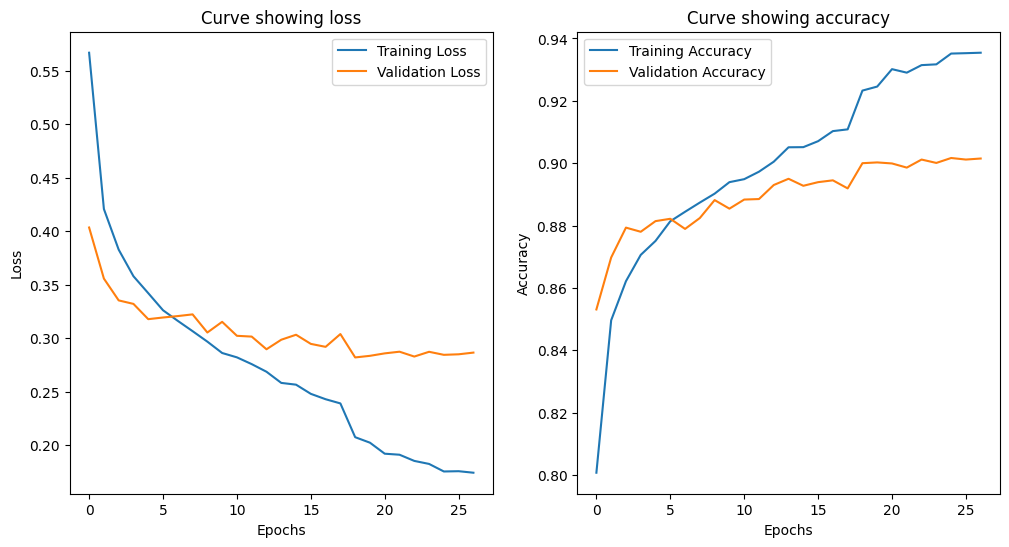

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Curve showing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Curve showing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
